# Clustering con K-means

[Curso de Clustering con Python y scikit-learn](https://platzi.com/cursos/clustering)

## Importar librerías

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

## Preparando datos de prueba

In [11]:
X,y,c = make_blobs(500, cluster_std= 0.8, centers=4, n_features=2, return_centers=True)

In [12]:
df_blobs = pd.DataFrame(
    {
        'x1': X[:,0],
        'x2': X[:,1],
        'y': y
    }
)


In [14]:
df_centers = pd.DataFrame(
    {
        'x1': c[:,0],
        'x2' :c[:,1]
    }
)
df_centers

,x1,x2
0,-5.277284,0.757506
1,3.786776,-8.020369
2,-3.159905,-0.086924
3,-2.898227,-8.043157


## Visualización de datos

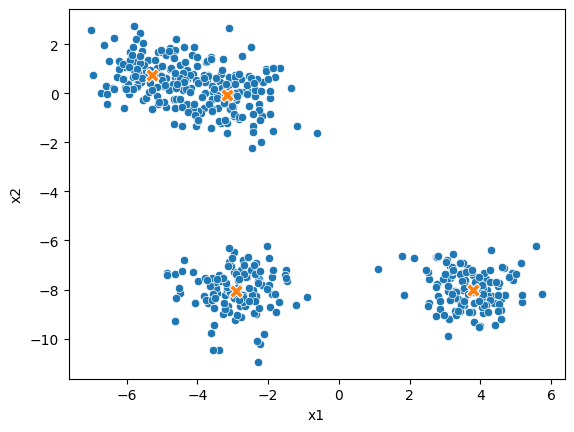

In [18]:
sns.scatterplot(data=df_blobs, x='x1', y='x2')
sns.scatterplot(data=df_centers,  x='x1', y='x2', marker='X', s=100 )
plt.show()

## Aplicando K-means

In [20]:
kmeans = KMeans(n_clusters=4)
df_cluster = kmeans.fit_predict(X)
df_blobs['cluster'] = df_cluster
k_means_centers = kmeans.cluster_centers_
df_k_means_center = pd.DataFrame(
    {
        'x1':k_means_centers[:,0],
        'x2':k_means_centers[:,1]
     
    }
)
df_k_means_center

,x1,x2
0,-2.918982,-8.036457
1,-5.315502,0.809679
2,3.676442,-7.953549
3,-3.091615,-0.087762


In [21]:
fig = plt.figure(figsize=(9,9))
sns.scatterplot(data=df_blobs,  x='x1', y='x2', hue= 'cluster', palette='coolwarm')
sns.scatterplot(data=df_centers,  x='x1', y='x2', marker='X', s=150 , color='red')
sns.scatterplot(data=df_k_means_center,  x='x1', y='x2', marker='o', s=150 , color='yellow')
plt.show()


: 

In [ ]:
def vis_cluster(k):
    kmeans = KMeans(n_clusters=k)
    df_cluster = kmeans.fit_predict(X)
    df_blobs['cluster'] = df_cluster
    k_means_centers = kmeans.cluster_centers_
    df_k_means_center = pd.DataFrame(
        {
            'x1':k_means_centers[:,0],
            'x2':k_means_centers[:,1]

        }
    )    
    fig = plt.figure(figsize=(9,9))
    sns.scatterplot(data=df_blobs,  x='x1', y='x2', hue= 'cluster', palette='coolwarm')
    sns.scatterplot(data=df_centers,  x='x1', y='x2', marker='X', s=150 , color='red')
    sns.scatterplot(data=df_k_means_center,  x='x1', y='x2', marker='o', s=150 , color='yellow')
    plt.show()

3


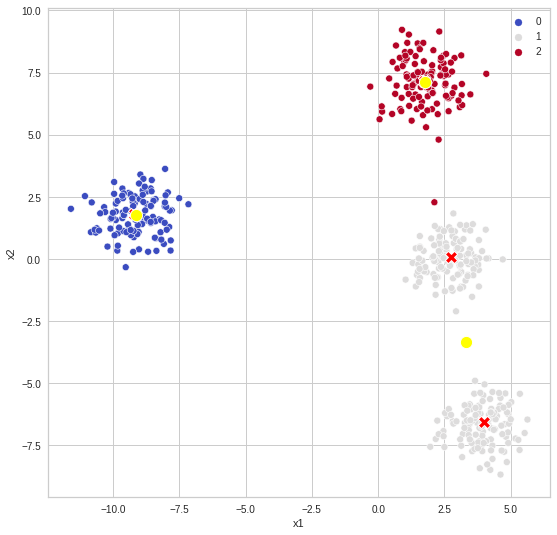

4


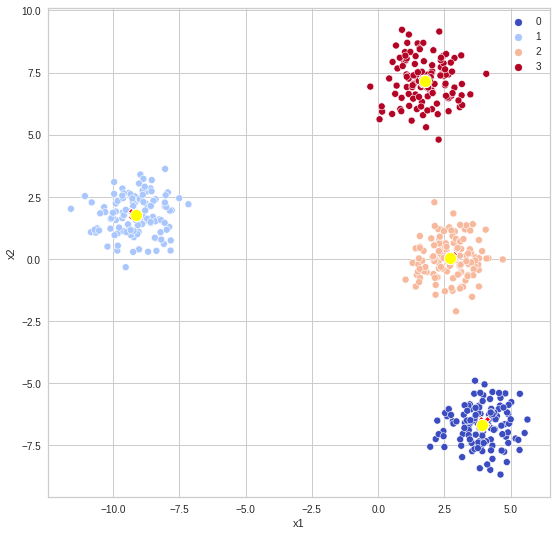

5


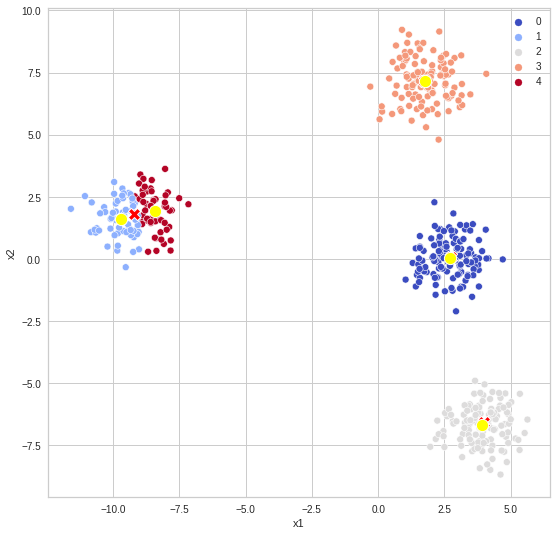

6


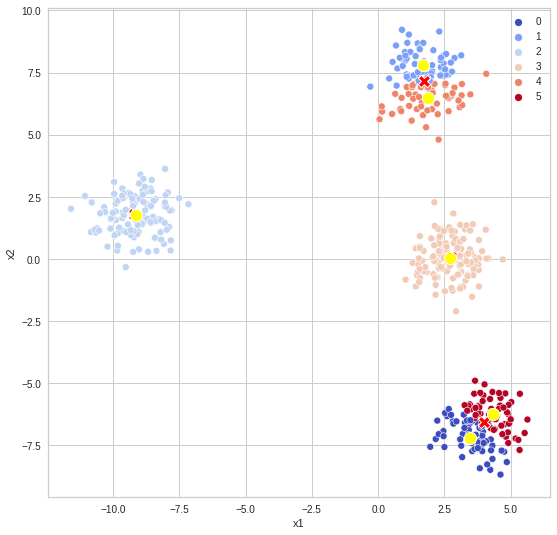

In [ ]:
for _ in range(3,7):
    print(_)
    vis_cluster(_)

## Encontrando el valor de K

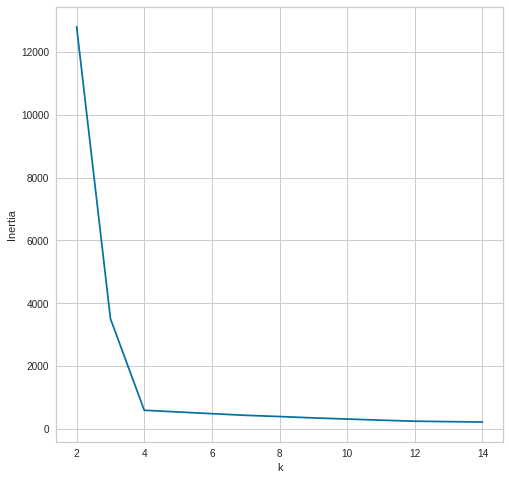

In [ ]:
sum_of_squared_distances = []
K = range(2,15)
for k in K: 
    km = KMeans(n_clusters=k)
    km = km.fit(X)
    sum_of_squared_distances.append(km.inertia_)

plt.figure(figsize=(8,8))
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.show()


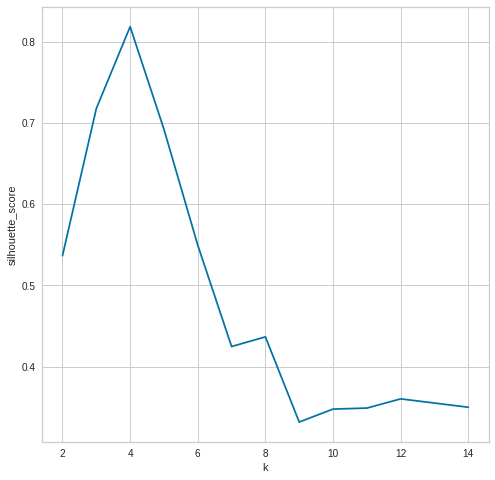

In [ ]:
silhouette_scores = []
K = range(2,15)
for k in K: 
    km = KMeans(n_clusters=k)
    km = km.fit(X)
    y = km.predict(X)
    silhouette_scores.append(silhouette_score(X,y))

plt.figure(figsize=(8,8))
plt.plot(K, silhouette_scores, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette_score')
plt.show()

## Evaluando clusters con K-means

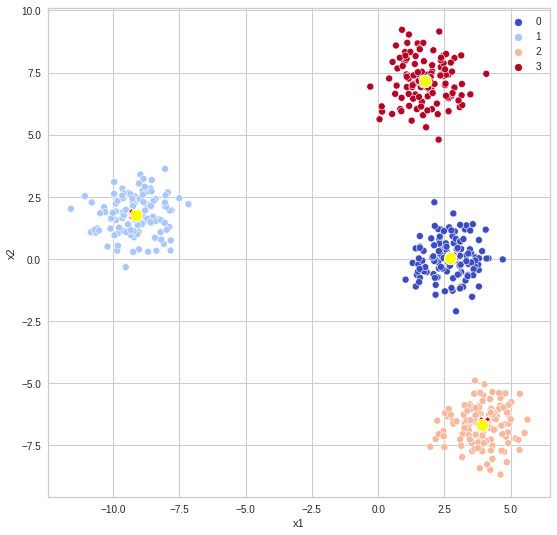

In [ ]:
vis_cluster(4)

SilhouetteVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f3c2e9a85d0>,
                     colors='yellowbrick', estimator=KMeans(n_clusters=4))

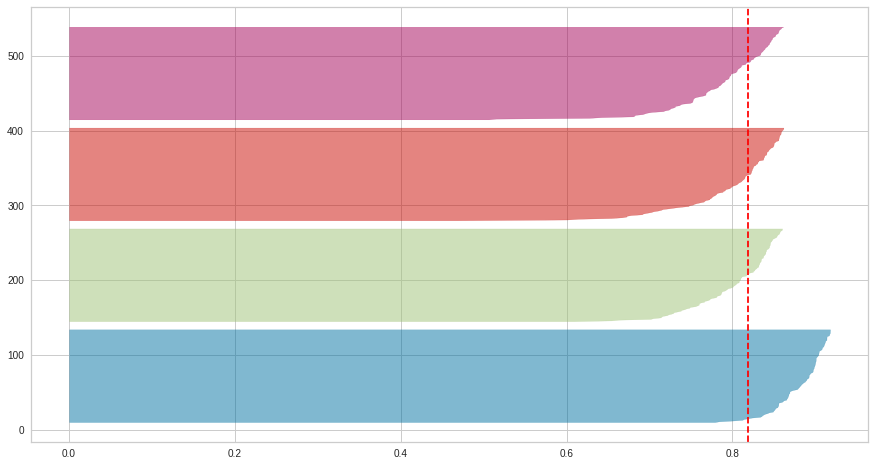

In [ ]:
plt.figure(figsize=(15,8))
km = KMeans(n_clusters=4) 
visualizer = SilhouetteVisualizer(km, colors='yellowbrick')
visualizer.fit(X)